In [ ]:
import os
import json
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# ระบุโฟลเดอร์ที่เก็บข้อมูลทดสอบ
test_data_dir = '/content/drive/MyDrive/test'

# สร้าง Dataset จากโฟลเดอร์ข้อมูลทดสอบ
batch_size = 32
test_datasetzz = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    batch_size=batch_size,  # ระบุ batch size ตามที่คุณต้องการ
    image_size=(244, 244),  # ระบุขนาดของรูปภาพ
    shuffle=False,
    )# ไม่ต้องการการสับเปลี่ยนข้อมูลเนื่องจากเป็นข้อมูลทดสอบ

Found 300 files belonging to 10 classes.


In [ ]:
x_test = []
y_test = []

for images, labels in test_datasetzz:
    x_test.append(images)  # เพิ่ม Tensor รูปภาพลงใน x_test
    y_test.append(labels)  # เพิ่ม Tensor ป้ายกำกับลงใน y_test

# แปลง List ของ x_test และ y_test เป็น Tensor
x_test = tf.concat(x_test, axis=0)
y_test = tf.concat(y_test, axis=0)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=70,
    width_shift_range=0.6,
    height_shift_range=0.6,
    shear_range=0.6,
    zoom_range=0.6,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.2, 1.5]
)

In [ ]:
batch_size = 8
train_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Pic',
    target_size=(244, 244),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/vava',
    target_size=(244, 244),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)

test_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/test',
    target_size=(244, 244),
    color_mode="rgb",
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=42,
)
x_test = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/test',
    target_size=(244, 244),
    color_mode="rgb",
    batch_size=1,
    shuffle=False,
    seed=42,
)

Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [ ]:
y_test = test_generator.classes

In [ ]:
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
patience = 2
stop_patience = 5
factor = 0.5

callbacks = [
    ModelCheckpoint("my_model_weights.h5", save_best_only=True, verbose = 0),
    EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

In [ ]:
# Training the model
epochs = 12  # Number of training epochs
batch_size = 32 # Batch size for training

# Train the model using training data and validate using validation data
history = model.fit(train_generator,
                    epochs=epochs,
                    callbacks = callbacks,
                    batch_size=batch_size,
                    validation_data= (valid_generator)
                    )


NameError: ignored

In [ ]:
best_model = model
best_model.load_weights('/content/drive/MyDrive/my_model_weights (1).h5')
best_model.evaluate(train_generator)

 26/300 [=>............................] - ETA: 18:26 - loss: 1.1506 - accuracy: 0.6490

KeyboardInterrupt: ignored

In [ ]:
predicted = best_model.predict(x_test)

300/300 [==============================] - 11s 32ms/step


In [ ]:
labels_dict = test_generator.class_indices
key_list = list(labels_dict.keys())
val_list = list(labels_dict.values())

In [ ]:
labels_dict

{'Banana in coconut milk': 0,
 'Clear Soup with Tofu and Minced Pork': 1,
 'Curry noodle soup with chicken': 2,
 'Egg and pork in sweet brown sauce': 3,
 'Fried eggs': 4,
 'Green curry': 5,
 'Mango sticky rice': 6,
 'Mussamun curry': 7,
 'Papaya salad': 8,
 'Thai Omlette': 9}

In [ ]:
from sklearn.preprocessing import LabelEncoder
predicted_indices = np.argmax(predicted, axis=1)
predicted_classes = [key_list[index] for index in predicted_indices]
predicted_en=predicted_indices

In [ ]:
predicted_en

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 4, 1, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 1, 0, 2, 2, 2, 6, 2, 2, 2, 2, 2, 5, 2, 2, 2,
       7, 2, 3, 3, 0, 3, 3, 3, 0, 9, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 4, 3, 3, 3, 0, 4, 4, 4, 4, 2, 4, 0, 4, 4, 4, 4, 6,
       8, 4, 4, 4, 0, 4, 4, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 2, 5, 7, 5, 5, 5, 2, 5, 5, 0, 5, 5, 5, 5, 5, 1, 5, 0, 5, 5,
       5, 5, 0, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 0, 6, 6, 6, 6, 6,
       6, 0, 0, 0, 6, 0, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7,
       7, 7, 3, 7, 7, 7, 7, 0, 7, 0, 3, 7, 2, 6, 7, 7, 7, 7, 7, 3, 8, 0,
       8, 8, 8, 8, 8, 0, 8, 4, 8, 8, 8, 2, 8, 8, 8, 8, 8, 4, 8, 4, 8, 8,
       8, 4, 8, 2, 8, 8, 9, 9, 0, 9, 0, 9, 2, 9, 0, 9, 9, 0, 9, 9, 9, 9,
       9, 9, 9, 3, 9, 9, 9, 9, 9, 9, 0, 9, 9, 2])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# คำนวณคะแนน Accuracy
accuracy = accuracy_score(y_test, predicted_en)

# คำนวณคะแนน Precision
precision = precision_score(y_test, predicted_en, average="weighted")

# คำนวณคะแนน Recall
recall = recall_score(y_test, predicted_en, average="weighted")

# คำนวณคะแนน F1-score
f1 = f1_score(y_test, predicted_en, average="weighted")

# แสดงผลคะแนนทั้งหมด
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7533333333333333
Precision: 0.8130511606789658
Recall: 0.7533333333333333
F1-score: 0.7681330508172467


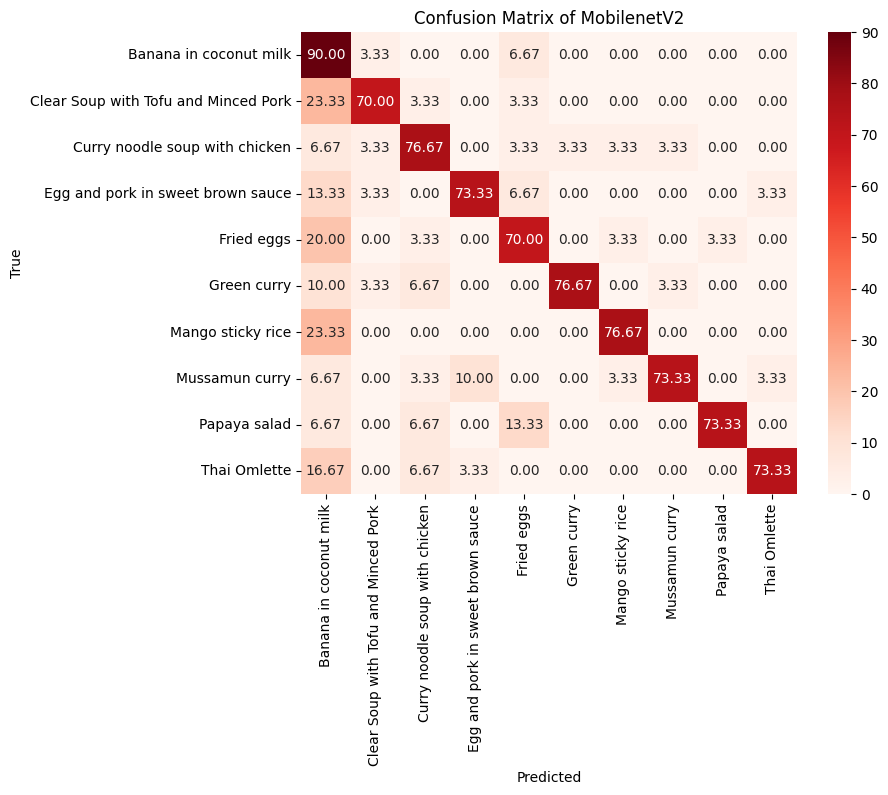

In [ ]:
# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, predicted_en)

# แสดง Confusion Matrix ในรูปของ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis] * 100, annot=True, fmt='.2f', cmap='Reds', xticklabels=['Banana in coconut milk', 'Clear Soup with Tofu and Minced Pork', 'Curry noodle soup with chicken','Egg and pork in sweet brown sauce','Fried eggs','Green curry','Mango sticky rice','Mussamun curry','Papaya salad','Thai Omlette'], yticklabels=['Banana in coconut milk', 'Clear Soup with Tofu and Minced Pork', 'Curry noodle soup with chicken','Egg and pork in sweet brown sauce','Fried eggs','Green curry','Mango sticky rice','Mussamun curry','Papaya salad','Thai Omlette'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of MobilenetV2')
plt.show()

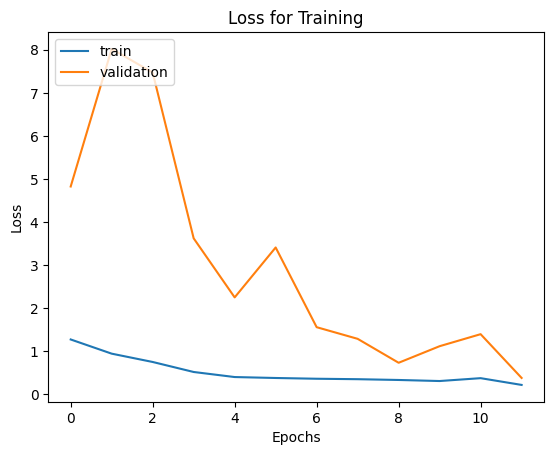

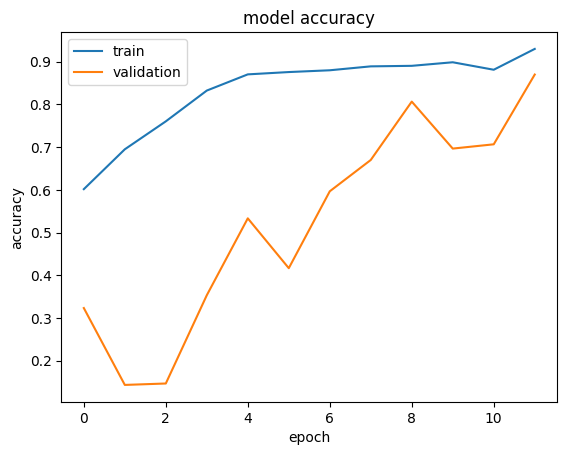

In [ ]:
plt.plot(history.history['loss'], label='Loss (train_generator)')
plt.plot(history.history['val_loss'], label='Loss (valid_generator)')
plt.title('Loss for Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
batch_size = 8
train_generator2 = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Pic',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator2 = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/vava',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)


test_generator2 = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/test',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [ ]:
test_data_dir = '/content/drive/MyDrive/test'

# สร้าง Dataset จากโฟลเดอร์ข้อมูลทดสอบ
batch_size = 32
test_dataset_ef = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    batch_size=batch_size,  # ระบุ batch size ตามที่คุณต้องการ
    image_size=(224, 224),  # ระบุขนาดของรูปภาพ
    shuffle=False,
    )# ไม่ต้องการการสับเปลี่ยนข้อมูลเนื่องจากเป็นข้อมูลทดสอบ

Found 300 files belonging to 10 classes.


In [ ]:
base_model_Ef = EfficientNetB0(include_top=False, input_shape=(224,224,3), weights='imagenet')
modelef = models.Sequential([
    base_model_Ef,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

In [ ]:
modelef.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
patience = 2
stop_patience = 5
factor = 0.5

callbacks = [
    ModelCheckpoint("my_model_weights_EF.h5", save_best_only=True, verbose = 0),
    EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

In [ ]:
# Training the model
epochs = 12  # Number of training epochs
batch_size = 32 # Batch size for training

# Train the model using training data and validate using validation data
historyef = modelef.fit(train_generator2,
                    epochs=epochs,
                    callbacks = callbacks,
                    batch_size=batch_size,
                    validation_data= (valid_generator2)
                    )


Epoch 1/12
300/300 [==============================] - 98s 187ms/step - loss: 1.8157 - accuracy: 0.4267 - val_loss: 2.5476 - val_accuracy: 0.0933 - lr: 1.0000e-04
Epoch 2/12
300/300 [==============================] - 53s 178ms/step - loss: 0.8592 - accuracy: 0.7229 - val_loss: 2.6229 - val_accuracy: 0.1633 - lr: 1.0000e-04
Epoch 3/12
300/300 [==============================] - 53s 175ms/step - loss: 0.6286 - accuracy: 0.8029 - val_loss: 1.6650 - val_accuracy: 0.4267 - lr: 1.0000e-04
Epoch 4/12
300/300 [==============================] - 54s 178ms/step - loss: 0.5045 - accuracy: 0.8288 - val_loss: 2.0698 - val_accuracy: 0.3633 - lr: 1.0000e-04
Epoch 5/12
300/300 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.8612
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
300/300 [==============================] - 53s 177ms/step - loss: 0.4393 - accuracy: 0.8612 - val_loss: 2.2555 - val_accuracy: 0.3767 - lr: 1.0000e-04
Epoch 6/12
300/300 [=========

In [ ]:
x_testef = []
y_testef = []

for images, labels in test_dataset_ef:
    x_testef.append(images)  # เพิ่ม Tensor รูปภาพลงใน x_test
    y_testef.append(labels)  # เพิ่ม Tensor ป้ายกำกับลงใน y_test

# แปลง List ของ x_test และ y_test เป็น Tensor
x_testef = tf.concat(x_testef, axis=0)
y_testef = tf.concat(y_testef, axis=0)

TypeError: ignored

In [ ]:
labels_dict2 = test_generator2.class_indices
key_list2 = list(labels_dict.keys())
val_list2 = list(labels_dict.values())

In [ ]:
best_model_ef = modelef
best_model_ef.load_weights('./my_model_weights_EF.h5')
best_model_ef.evaluate(train_generator2)

300/300 [==============================] - 49s 163ms/step - loss: 0.2435 - accuracy: 0.9229


[0.24352717399597168, 0.9229166507720947]

In [ ]:
# Evaluating the model on test data
predicted_ef = best_model_ef.predict(x_test)


300/300 [==============================] - 10s 22ms/step


In [ ]:
predicted_ef

array([[9.7017944e-01, 3.7059563e-03, 7.0885679e-04, ..., 2.2561485e-03,
        7.7852642e-04, 1.3664048e-03],
       [6.9133502e-01, 1.0473813e-02, 2.7063826e-02, ..., 7.1132893e-04,
        2.5960081e-03, 3.0728870e-03],
       [9.9974638e-01, 4.0455411e-06, 4.2267234e-06, ..., 1.8689505e-05,
        3.6247759e-05, 7.0964321e-05],
       ...,
       [8.5370737e-04, 8.6041790e-04, 6.2245235e-04, ..., 3.7730376e-03,
        1.5591784e-05, 9.9269038e-01],
       [2.3932756e-04, 7.2691595e-04, 1.0783205e-04, ..., 9.4802334e-04,
        4.2929540e-05, 9.8909420e-01],
       [9.6204784e-04, 5.8451429e-04, 1.3208530e-04, ..., 7.5814448e-04,
        4.1399701e-03, 3.8814944e-01]], dtype=float32)

In [ ]:
predicted_indices2 = np.argmax(predicted_ef, axis=1)
predicted_classes2 = [key_list2[index] for index in predicted_indices2]
predicted_en2=predicted_indices2

In [ ]:
predicted_en2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 6, 8, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 2, 1, 2, 8, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 8, 1, 3, 3,
       3, 3, 3, 4, 3, 7, 3, 3, 3, 0, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 9,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 0, 5, 5,
       5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5,
       5, 5, 5, 5, 6, 9, 0, 4, 4, 6, 6, 6, 6, 6, 1, 0, 0, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 6, 1, 6, 6, 6, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 2, 8, 8, 8, 8, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 6, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# คำนวณคะแนน Accuracy
accuracy_ef = accuracy_score(y_test, predicted_indices2)

# คำนวณคะแนน Precision
precision_ef = precision_score(y_test, predicted_indices2, average="weighted")

# คำนวณคะแนน Recall
recall_ef = recall_score(y_test, predicted_indices2, average="weighted")

# คำนวณคะแนน F1-score
f1_ef = f1_score(y_test, predicted_indices2, average="weighted")

# แสดงผลคะแนนทั้งหมด
print("Accuracy:", accuracy_ef)
print("Precision:", precision_ef)
print("Recall:", recall_ef)
print("F1-score:", f1_ef)

Accuracy: 0.8833333333333333
Precision: 0.8890892444139599
Recall: 0.8833333333333333
F1-score: 0.882787071469585


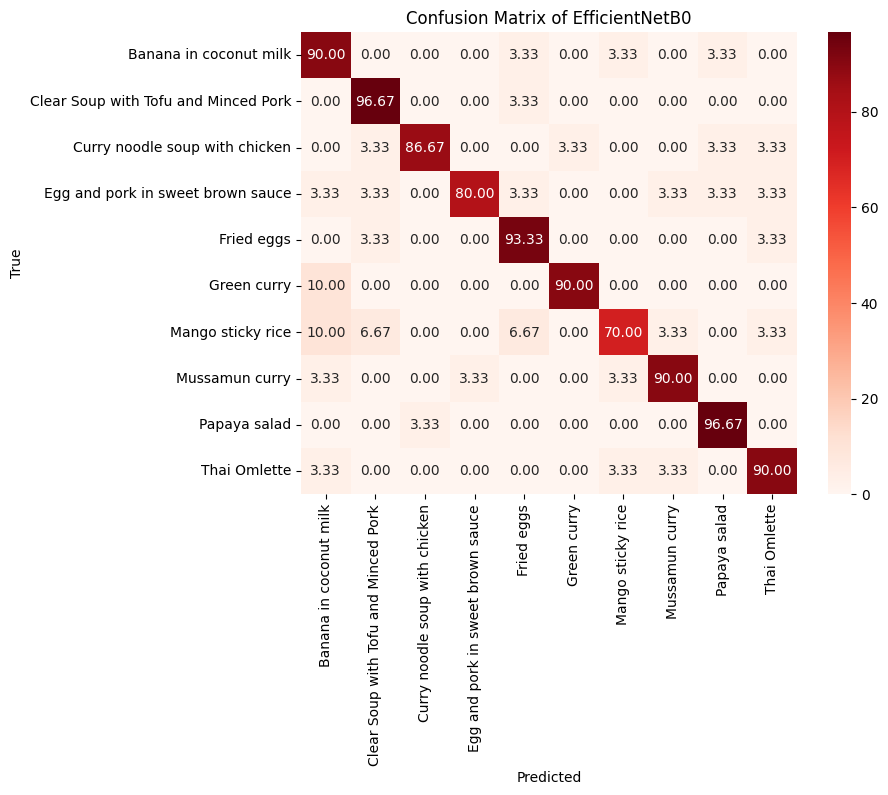

In [ ]:
# สร้าง Confusion Matrix
cmef = confusion_matrix(y_test, predicted_indices2)

# แสดง Confusion Matrix ในรูปของ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmef / cmef.sum(axis=1)[:, np.newaxis] * 100, annot=True, fmt='.2f', cmap='Reds', xticklabels=['Banana in coconut milk', 'Clear Soup with Tofu and Minced Pork', 'Curry noodle soup with chicken','Egg and pork in sweet brown sauce','Fried eggs','Green curry','Mango sticky rice','Mussamun curry','Papaya salad','Thai Omlette'], yticklabels=['Banana in coconut milk', 'Clear Soup with Tofu and Minced Pork', 'Curry noodle soup with chicken','Egg and pork in sweet brown sauce','Fried eggs','Green curry','Mango sticky rice','Mussamun curry','Papaya salad','Thai Omlette'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of EfficientNetB0')
plt.show()

In [ ]:
Restnet = tf.keras.applications.ResNet50(include_top=False, input_shape=(224,224,3), weights='imagenet')
Restnet_model = models.Sequential([
    Restnet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
Restnet_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
patience = 2
stop_patience = 5
factor = 0.5

callbacks = [
    ModelCheckpoint("my_model_weights_Rest.h5", save_best_only=True, verbose = 0),
    EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

In [ ]:
# Training the model
epochs = 12  # Number of training epochs
batch_size = 32 # Batch size for training

# Train the model using training data and validate using validation data
historyRest = Restnet_model.fit(train_generator2,
                    epochs=epochs,
                    callbacks = callbacks,
                    batch_size=batch_size,
                    validation_data= (valid_generator2)
                    )

Epoch 1/12
300/300 [==============================] - ETA: 0s - loss: 0.9529 - accuracy: 0.6900

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 100s 195ms/step - loss: 0.9529 - accuracy: 0.6900 - val_loss: 5.1170 - val_accuracy: 0.1067 - lr: 1.0000e-04
Epoch 2/12
300/300 [==============================] - 58s 192ms/step - loss: 0.4418 - accuracy: 0.8567 - val_loss: 3.8735 - val_accuracy: 0.1000 - lr: 1.0000e-04
Epoch 3/12
300/300 [==============================] - 57s 191ms/step - loss: 0.3746 - accuracy: 0.8867 - val_loss: 0.7055 - val_accuracy: 0.8267 - lr: 1.0000e-04
Epoch 4/12
300/300 [==============================] - 56s 185ms/step - loss: 0.2921 - accuracy: 0.9021 - val_loss: 0.1992 - val_accuracy: 0.9467 - lr: 1.0000e-04
Epoch 5/12
300/300 [==============================] - 54s 181ms/step - loss: 0.2818 - accuracy: 0.9146 - val_loss: 0.2617 - val_accuracy: 0.9300 - lr: 1.0000e-04
Epoch 6/12
300/300 [==============================] - ETA: 0s - loss: 0.2145 - accuracy: 0.9346
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
300/300 [===================

In [ ]:
best_model_rest = Restnet_model
best_model_rest.load_weights('./my_model_weights_Rest.h5')
best_model_rest.evaluate(train_generator2)

300/300 [==============================] - 44s 147ms/step - loss: 0.0151 - accuracy: 0.9962


[0.015105115249752998, 0.9962499737739563]

In [ ]:
predicted_labels_Rest = best_model_rest.predict(x_test)

300/300 [==============================] - 9s 30ms/step


In [ ]:
labels_dict3 = test_generator2.class_indices
key_list3 = list(labels_dict3.keys())
val_list3= list(labels_dict3.values())

In [ ]:
predicted_indices3 = np.argmax(predicted_labels_Rest, axis=1)
predicted_classes3 = [key_list3[index] for index in predicted_indices3]
predicted_en3=predicted_indices3

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# คำนวณคะแนน Accuracy
accuracy_rest = accuracy_score(y_test, predicted_en3)

# คำนวณคะแนน Precision
precision_rest = precision_score(y_test, predicted_en3, average="weighted")

# คำนวณคะแนน Recall
recall_rest = recall_score(y_test, predicted_en3, average="weighted")

# คำนวณคะแนน F1-score
f1_rest = f1_score(y_test, predicted_en3, average="weighted")

# แสดงผลคะแนนทั้งหมด
print("Accuracy:", accuracy_rest)
print("Precision:", precision_rest)
print("Recall:", recall_rest)
print("F1-score:", f1_rest)

Accuracy: 0.9733333333333334
Precision: 0.9755336812144213
Recall: 0.9733333333333334
F1-score: 0.9735664179210577


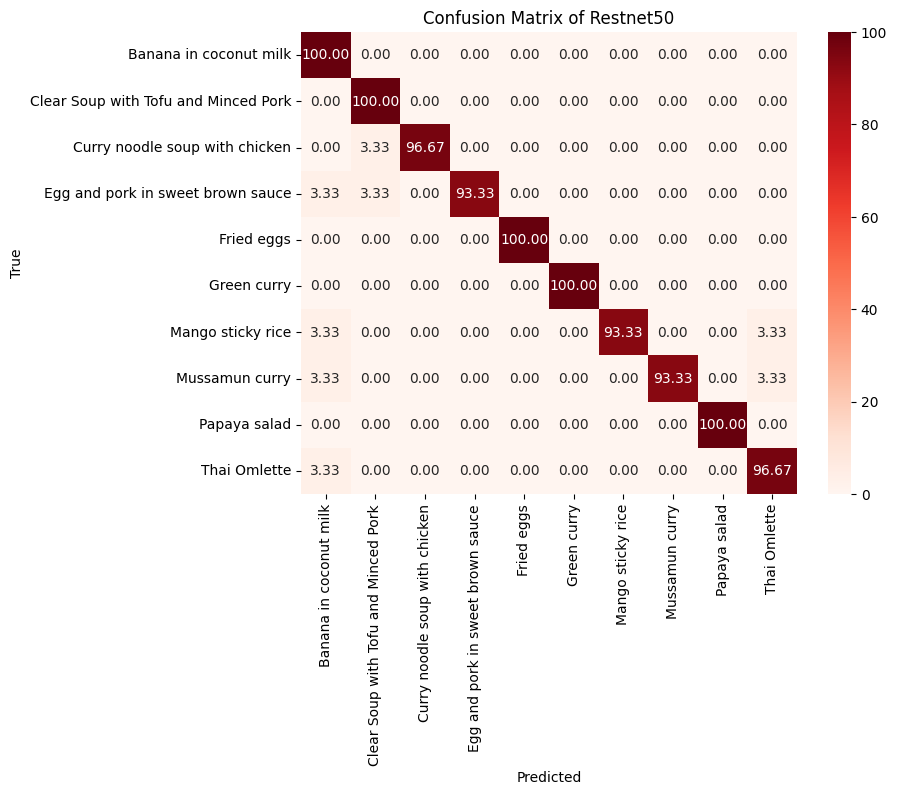

In [ ]:
cmrest = confusion_matrix(y_test, predicted_indices3)

# แสดง Confusion Matrix ในรูปของ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmrest / cmrest.sum(axis=1)[:, np.newaxis] * 100, annot=True, fmt='.2f', cmap='Reds', xticklabels=['Banana in coconut milk', 'Clear Soup with Tofu and Minced Pork', 'Curry noodle soup with chicken','Egg and pork in sweet brown sauce','Fried eggs','Green curry','Mango sticky rice','Mussamun curry','Papaya salad','Thai Omlette'], yticklabels=['Banana in coconut milk', 'Clear Soup with Tofu and Minced Pork', 'Curry noodle soup with chicken','Egg and pork in sweet brown sauce','Fried eggs','Green curry','Mango sticky rice','Mussamun curry','Papaya salad','Thai Omlette'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Restnet50')
plt.show()

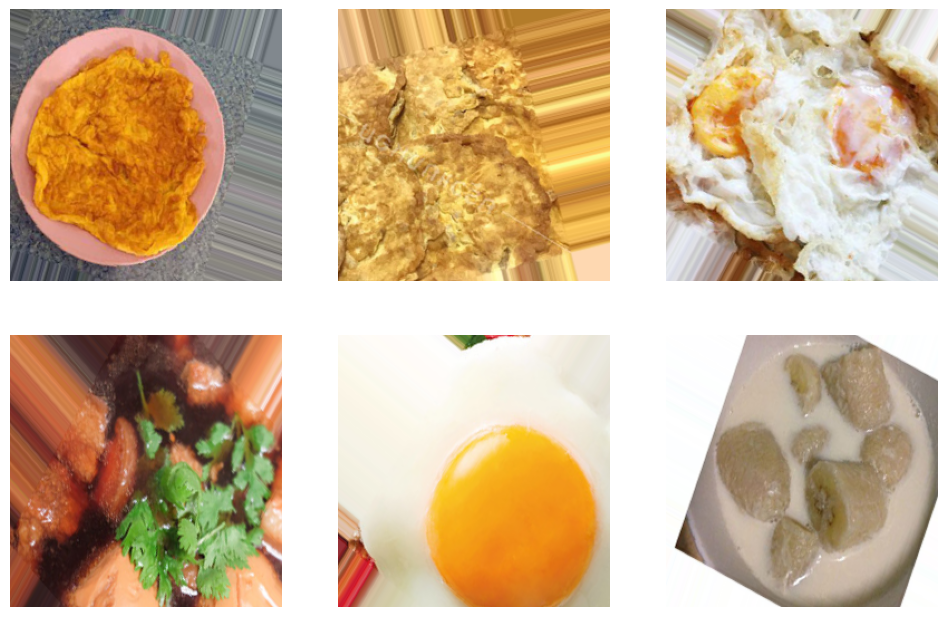

In [ ]:
augmented_images, _ = next(train_generator)

# Display the first 5 images from the batch
plt.figure(figsize=(12, 12))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')

plt.show()